**About this file**

* ID: unique ID of representative  
* Loan Amount: loan amount applied  
* Funded Amount:loan amount funded  
* Funded Amount Investor: loan amount approved by the investors  
* Term: term of loan (in months)  
* Batch Enrolled: batch numbers to representatives  
* Interest Rate: interest rate (%) on loan  
* Grade: grade by the bank 
* Sub Grade: sub-grade by the bank
* Debit to Income: ratio of representative's total monthly debt repayment      divided by self reported monthly income excluding mortgage 
* Delinquency - two years: number of 30+ days delinquency in past 2 - years   
* Inquires - six months: total number of inquiries in last 6 months  
* Open Account: number of open credit line in representative's - credit line  
* Public Record: number of derogatory public records 
* Revolving Balance: total credit revolving balance
* Revolving Utilities: amount of credit a representative is using - relative to revolving_balance
* Total Accounts: total number of credit lines available in - representatives credit line
* Initial List Status: unique listing status of the loan - - W(Waiting), F(Forwarded)
* Total Received Interest: total interest received till date
* Total Received Late Fee: total late fee received till date
* Recoveries: post charge off gross recovery
* Collection Recovery Fee: post charge off collection fee
* Collection 12 months Medical: total collections in last 12 months - excluding medical collections
* Application Type: indicates when the representative is an individual or joint
* Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled 
* Accounts Delinquent: number of accounts on which the representative is delinquent  
* Total Collection Amount: total collection amount ever owed  
* Total Current Balance: total current balance from all accounts 
* Total Revolving Credit Limit: total revolving credit limit
* Loan Status: 1 = Defaulter, 0 = Non Defaulters




















In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data =pd.read_csv("Loan_Defaulters.csv")

EDA

In [ ]:
data.shape

(67463, 35)

In [ ]:
data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Home Ownership                67463 non-null  object 
 10  Duration                      67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [ ]:
data.dtypes.value_counts()

int64      17
float64     9
object      9
dtype: int64

In [ ]:
data.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Duration                        0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [ ]:
data.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Home Ownership                   object
Duration                        float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


Data Cleaning


In [ ]:
data_clone=data
data = data.drop(['ID'], axis = 1)
data.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.63,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.58,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.83,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
data.isna().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Duration                        0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
 Total Received Late Fee        0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Accounts Delin

In [ ]:
data.duplicated().sum()

0

In [ ]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,176346.63,16.284758,1,0,13,...,0.102000,2.498291,0.793724,0,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,39833.92,15.412409,0,0,12,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,91506.69,28.137619,0,0,14,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,108286.58,18.043730,1,0,7,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,44234.83,17.209886,1,3,13,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,9.408858,83961.15,28.105127,1,0,13,...,0.023478,564.614852,0.865230,0,69,0,48,181775,34301,1
67459,8323,11046,15637.46301,59,9.972104,65491.13,17.694279,0,0,12,...,0.027095,2.015494,1.403368,0,14,0,37,22692,8714,0
67460,15897,32921,12329.45775,59,19.650943,34813.97,10.295774,0,0,7,...,0.028212,5.673092,1.607093,0,137,0,17,176857,42330,0
67461,16567,4975,21353.68465,59,13.169095,96938.84,7.614624,0,0,14,...,0.074508,1.157454,0.207608,0,73,0,61,361339,39075,0


In [ ]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,Batch Enrolled,Grade,Sub Grade,Home Ownership,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...
67458,BAT3193689,C,A4,MORTGAGE,Verified,n,Credit card refinancing,w,INDIVIDUAL
67459,BAT1780517,C,B3,RENT,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
67460,BAT1761981,A,F3,MORTGAGE,Verified,n,Lending loan,w,INDIVIDUAL
67461,BAT2333412,D,E3,OWN,Not Verified,n,Debt consolidation,f,INDIVIDUAL




**Univariate Analysis**

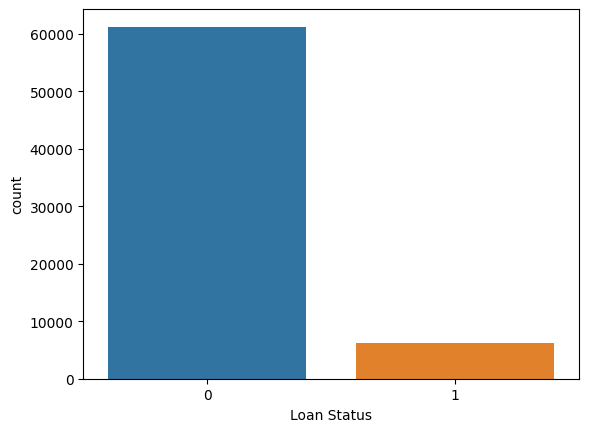

In [ ]:
sns.countplot(x='Loan Status',data=data);

In [ ]:
data['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

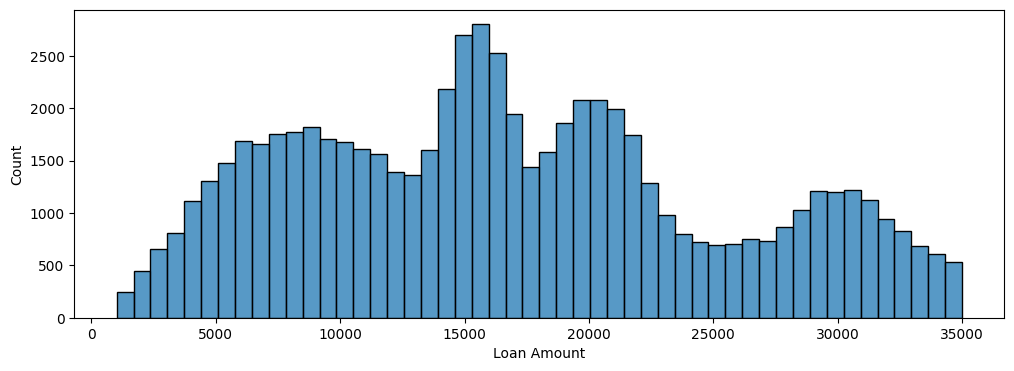

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data['Loan Amount'],bins=50);

From the above **Loan Amount** graph we can assume that most of the coustomers applied for 15k-18k Loan amount and the maximum loan amount is 35k

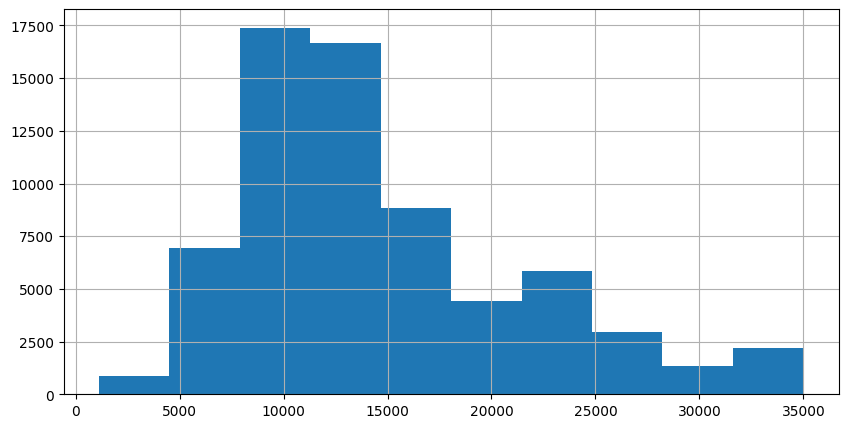

In [ ]:
data['Funded Amount Investor'].hist(figsize=(10,5))
plt.show()

 Invester funded the maximum loan amount 35k to less that 2500 customers.

<Axes: ylabel='Grade'>

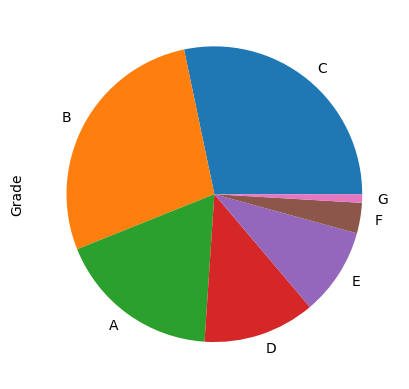

In [ ]:
data['Grade'].value_counts().plot(kind="pie")

In [ ]:
data['Grade'].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

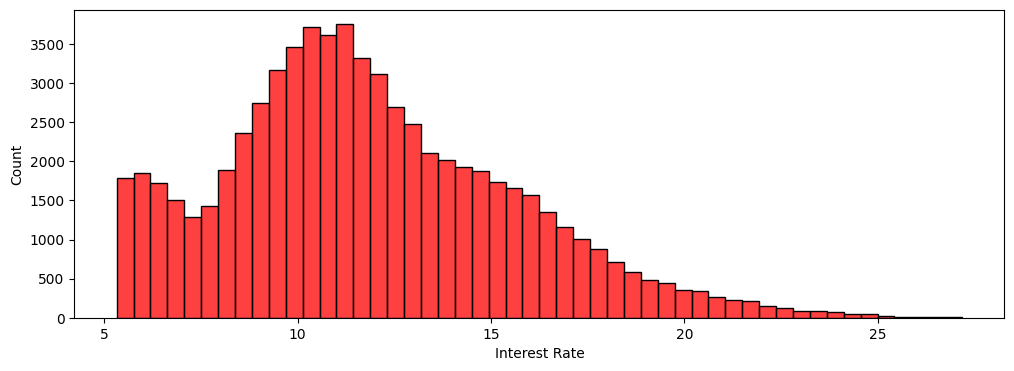

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data['Interest Rate'],bins=50,color='Red' );

Approximately 3500 customers take loan at 11-12% interest 

Highest interest rate is 27%

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Home Ownership',data=data);

From our data we can see that the homeownership of approximately 35000 cutomers is Mortgage

Approximately 25000 cutomers is Rent

and the rest are owned by the customers

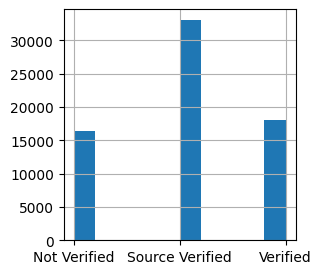

In [ ]:
data['Verification Status'].hist(figsize=(3,3))
plt.show()

Description about the distribution
1)We can see around 24% cases (16K) cases of borrower's income are not verified
2)Non-Verified income can lead to loan defaults in future
3)Remaining 76% of cases are having Verified income

In [ ]:
data['Loan Title'].value_counts()

Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64

In [ ]:
#data['Loan Title'].value_counts().plot(kind="pie");

In [ ]:
data['Debit to Income'].value_counts()

24.977361    2
22.368527    2
18.792519    2
35.467099    2
24.505453    2
            ..
27.764362    1
35.819821    1
30.352185    1
27.560373    1
16.052112    1
Name: Debit to Income, Length: 67454, dtype: int64

From the loan title we can see that most of the loan is taken under the head of Debt Consolidation and Credit Consolidation

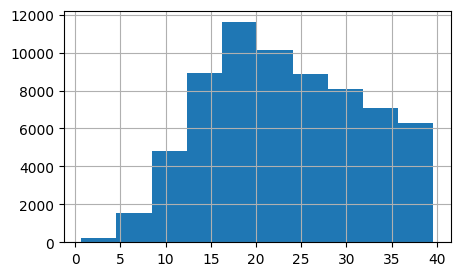

In [ ]:
data['Debit to Income'].hist(figsize=(5,3))
plt.show()

Description about the distribution
We can see most of the customers are in the Debt Income Ratio of 15% to 25%

We have around 6000 customers having greater than 35% Debt Income Ratio, This base of customers have a tendancy to go in bad-book as the debt Income ratio is high

Greater than 40% Debt Income Ratio, no cases found.



Delinquency - two years = No of times the borrower was in deliquent in the past two years

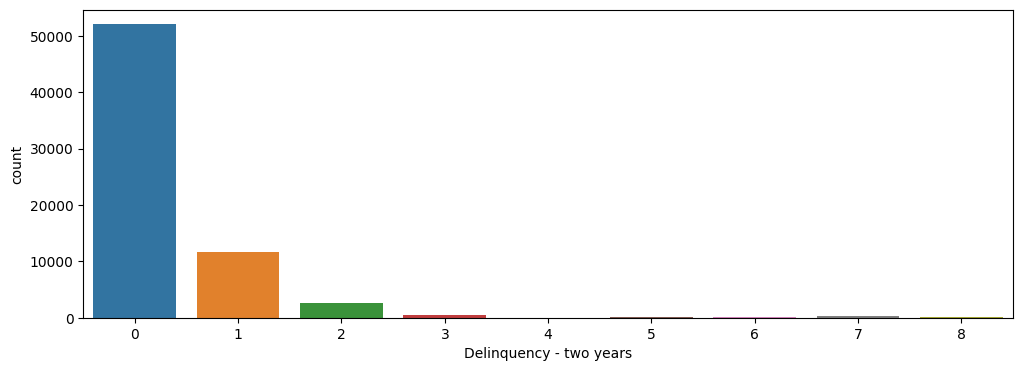

In [ ]:
#data['Delinquency - two years'].hist(figsize=(5,3))
#plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='Delinquency - two years',data=data);


In [ ]:
data[data['Delinquency - two years'] > 2]

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
5,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,98957.47561,...,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
19,14058,26523,9622.342364,59,BAT2003848,14.523373,A,C1,MORTGAGE,48423.25999,...,2.123521,1.056005,0,INDIVIDUAL,76,0,47,151581,9818,1
57,14592,12927,4079.189091,36,BAT2803411,14.320346,C,F4,RENT,134629.24640,...,0.906799,1.483051,0,INDIVIDUAL,71,0,52,136171,111908,0
171,18657,21847,11121.055040,59,BAT2803411,20.377332,D,F3,MORTGAGE,74712.79983,...,0.134779,0.660228,0,INDIVIDUAL,9,0,32,460701,6357,0
232,10949,17343,11036.761270,59,BAT2833642,14.039519,D,A3,MORTGAGE,80823.72130,...,2.620356,1.435308,0,INDIVIDUAL,159,0,30,213911,19850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67266,21039,22377,9946.797391,58,BAT4694572,11.279783,D,D1,RENT,42319.68188,...,0.850685,1.373300,0,INDIVIDUAL,100,0,58,329423,12604,0
67390,18318,19544,10013.401110,59,BAT1586599,9.912584,C,A1,MORTGAGE,129381.71990,...,2.552846,0.592808,0,INDIVIDUAL,12,0,32,189324,24167,0
67398,15939,8863,18915.327980,36,BAT2003848,11.859881,C,E1,RENT,61321.22951,...,1.689259,1.508336,0,INDIVIDUAL,49,0,2,185946,33165,1
67399,18184,11762,9185.160079,59,BAT1930365,18.461770,C,B5,MORTGAGE,87059.29421,...,4.268058,0.037827,0,INDIVIDUAL,14,0,31,304983,30995,0


Description about the distribution
Majority of cases are under the deliquency range less than 1.

Around 1022 customers have the deliquency range > 2 in this base, which can be prone to defaulters.

Inquires - six months = No of inquiries made on the borrower's credit in the past 6 months

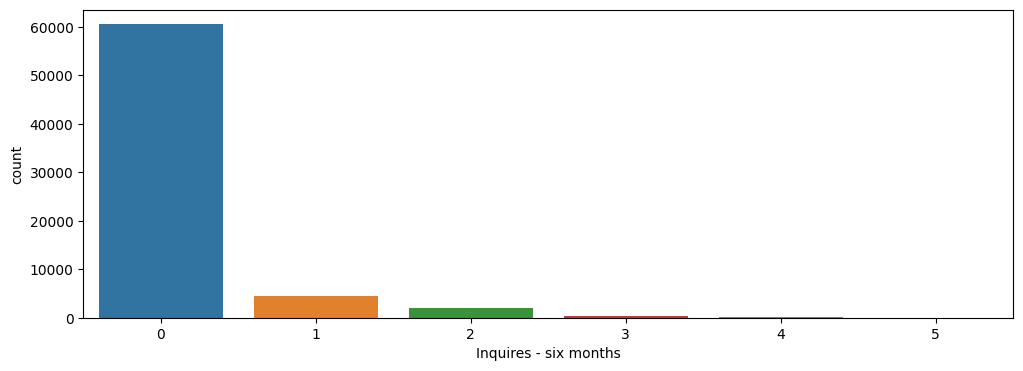

In [ ]:
#data['Inquires - six months'].hist(figsize=(5,3))
#plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='Inquires - six months',data=data);



In [ ]:
data[data['Inquires - six months'] > 2].count()

Loan Amount                     377
Funded Amount                   377
Funded Amount Investor          377
Term                            377
Batch Enrolled                  377
Interest Rate                   377
Grade                           377
Sub Grade                       377
Employment Duration             377
Home Ownership                  377
Verification Status             377
Payment Plan                    377
Loan Title                      377
Debit to Income                 377
Delinquency - two years         377
Inquires - six months           377
Open Account                    377
Public Record                   377
Revolving Balance               377
Revolving Utilities             377
Total Accounts                  377
Initial List Status             377
Total Received Interest         377
Total Received Late Fee         377
Recoveries                      377
Collection Recovery Fee         377
Collection 12 months Medical    377
Application Type            

Description about the distribution
Majority of cases are less than 1 for credit inquiries in past 6 months

Around 377 customers have the credit inquiries > 2 in this base, which can be prone to defaulters.

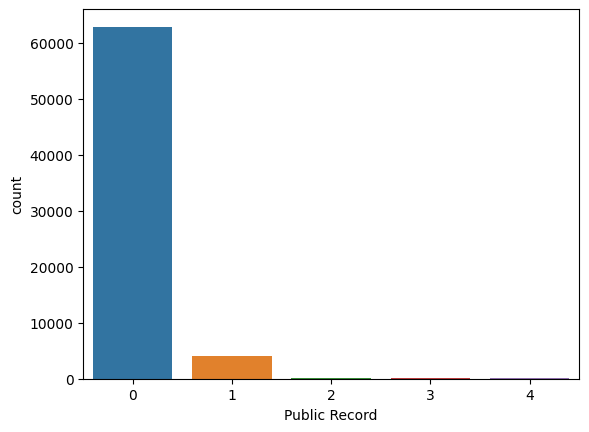

In [ ]:
sns.countplot(x='Public Record',data=data);

When the pulic record increases the defaulters ratio also increase but here we can see the number of defaulters is less

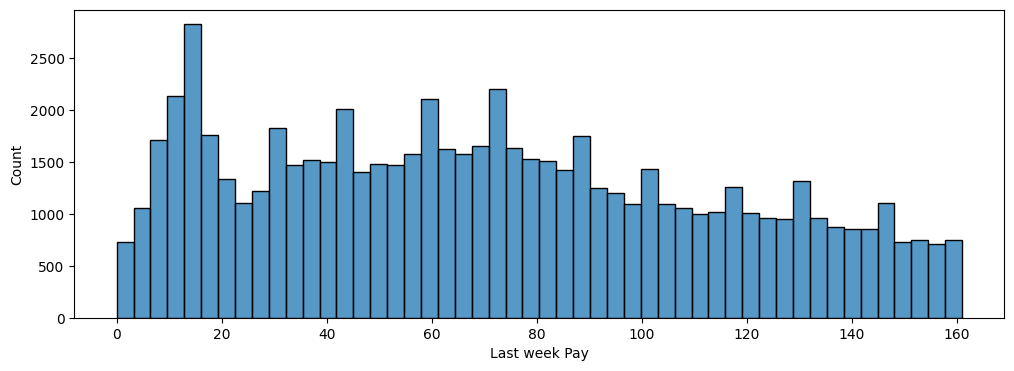

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data['Last week Pay'],bins=50);

This graph shows people having lesser values for last week pay are tend to be defaulters.

**Bivariate Analysis**

In [ ]:
# check for Loan Status with Home Ownership in the data using countplot
sns.countplot(data,x="Home Ownership",hue="Loan Status")
plt.show()


From the above graph it is clear that more number of defaulters come under Mortgage type home ownership

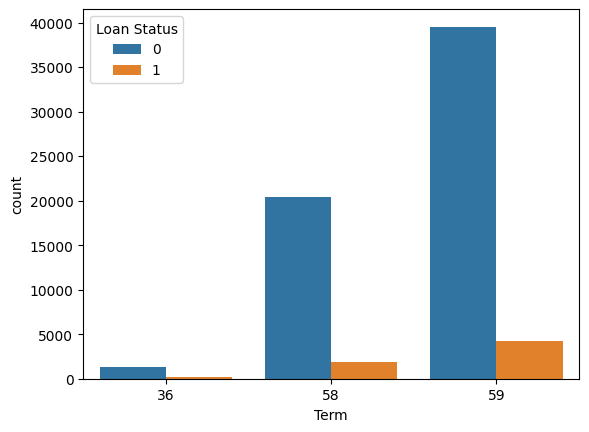

In [ ]:
# check for Loan Status with Term in the data using countplot

sns.countplot(data,x="Term",hue="Loan Status")
plt.show()


From the above graph more number of deafulters is found in Term 59 and least number of of deafulters found in Term 36

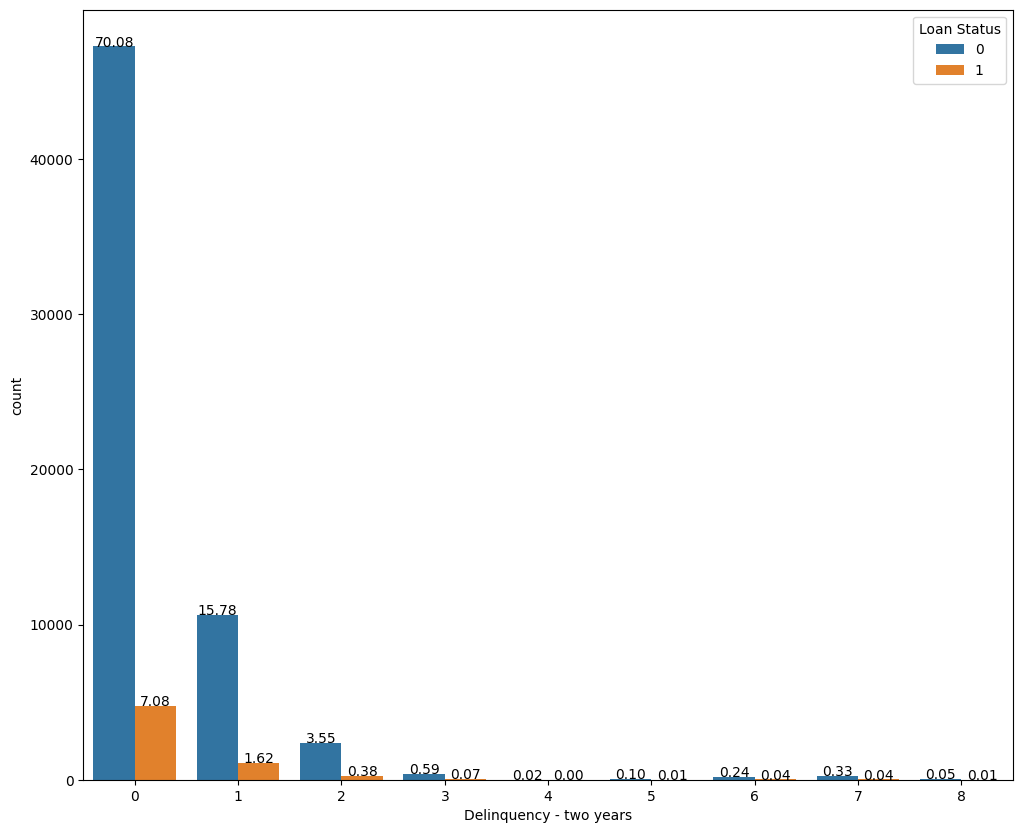

In [ ]:
# check for Loan Status with Delinquency - two years in the data using countplot
plt.figure(figsize=(12,10))
total = float(len(data["Loan Status"]) )

ax = sns.countplot(x="Delinquency - two years", hue="Loan Status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

From the graph it is clear that more number of defaulters are in 0 deliquency ,so this variable is not useful for analysis.

In [ ]:
data["Loan Status"].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

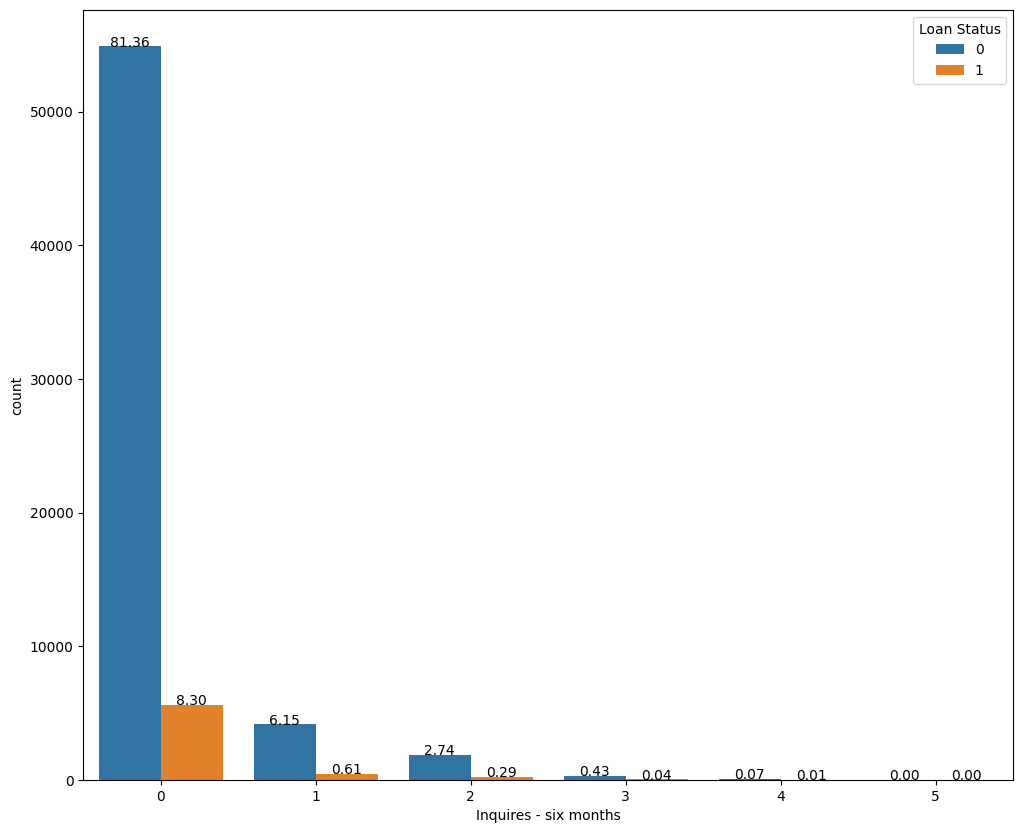

In [ ]:
# check for Loan Status with Inquires -six months in the data using countplot
plt.figure(figsize=(12,10))
total = float(len(data["Loan Status"]) )

ax = sns.countplot(x="Inquires - six months", hue="Loan Status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

From the above graph it is clear that more number of defaulters come under 0 inquires so we can say that this field is not useful for analysis.

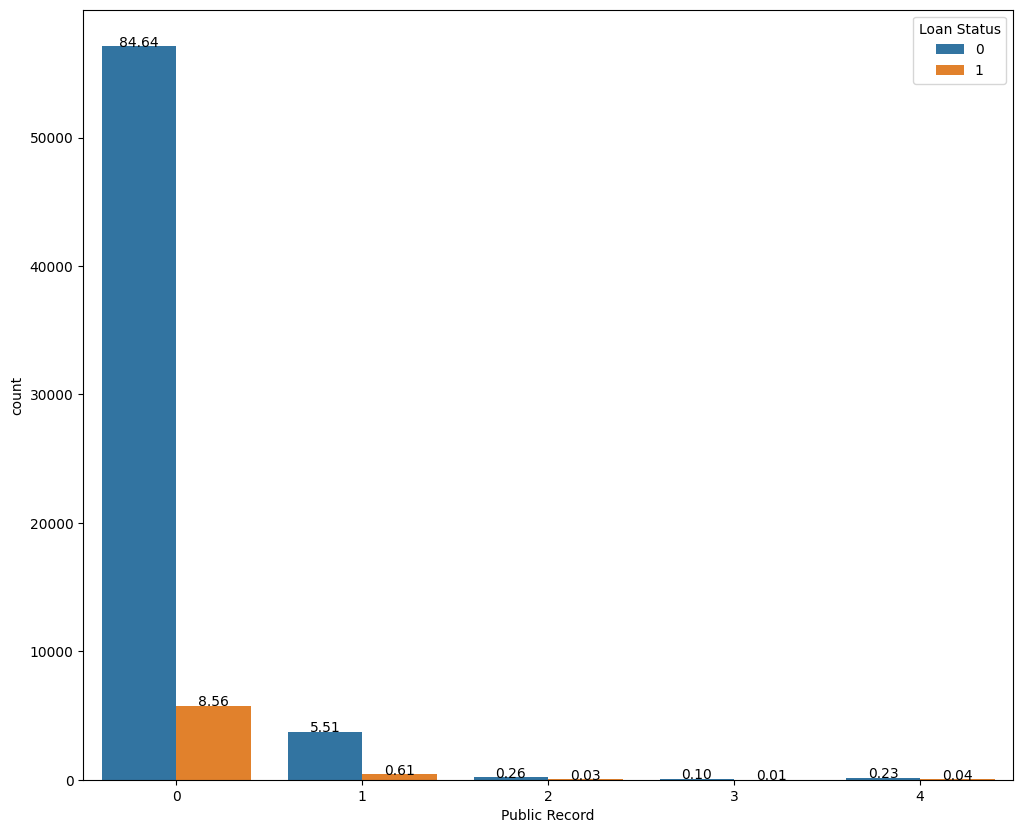

In [ ]:
# check for Loan Status with Public Record in the data using countplot
plt.figure(figsize=(12,10))
total = float(len(data["Loan Status"]) )

ax = sns.countplot(x="Public Record", hue="Loan Status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

From the above graph more defaulters are in public record 0 ,so it is not useful for analysis.

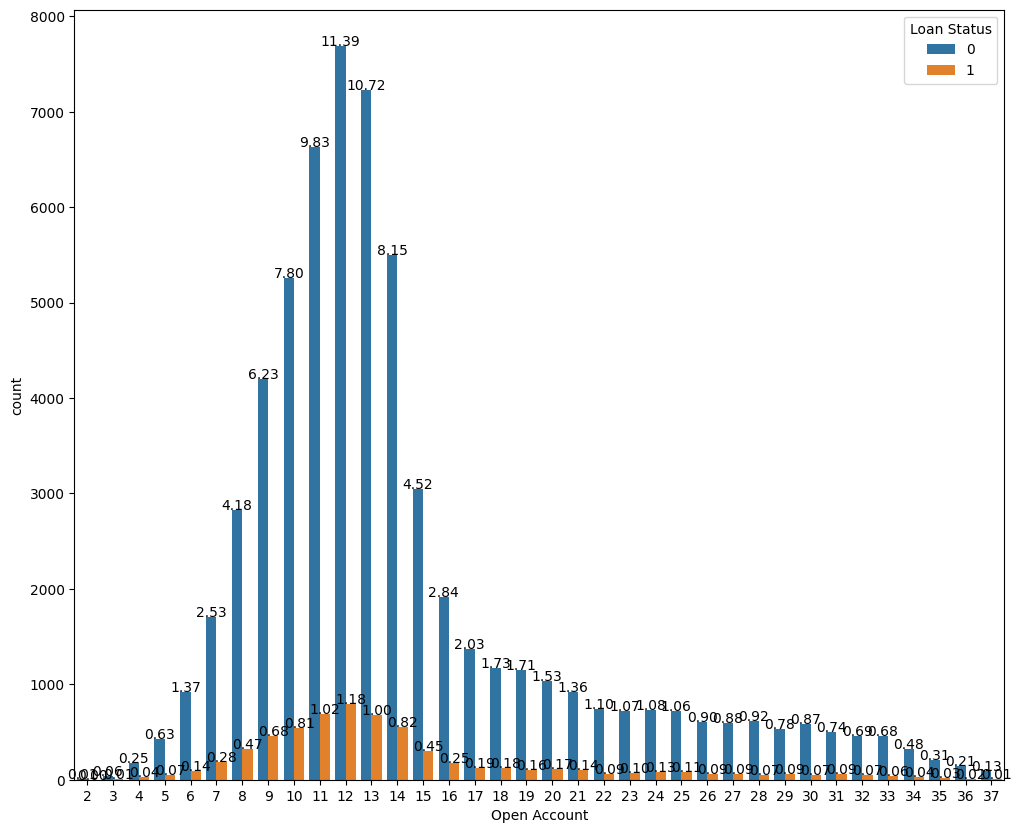

In [ ]:
# check for Loan Status with Open Account in the data using countplot
plt.figure(figsize=(12,10))
total = float(len(data["Loan Status"]) )

ax = sns.countplot(x="Open Account", hue="Loan Status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

From the above graph it is clear that more number of defaulters and non defaulters come under open account number 10 to 15 so it is the highest range.We consider this in analysis.

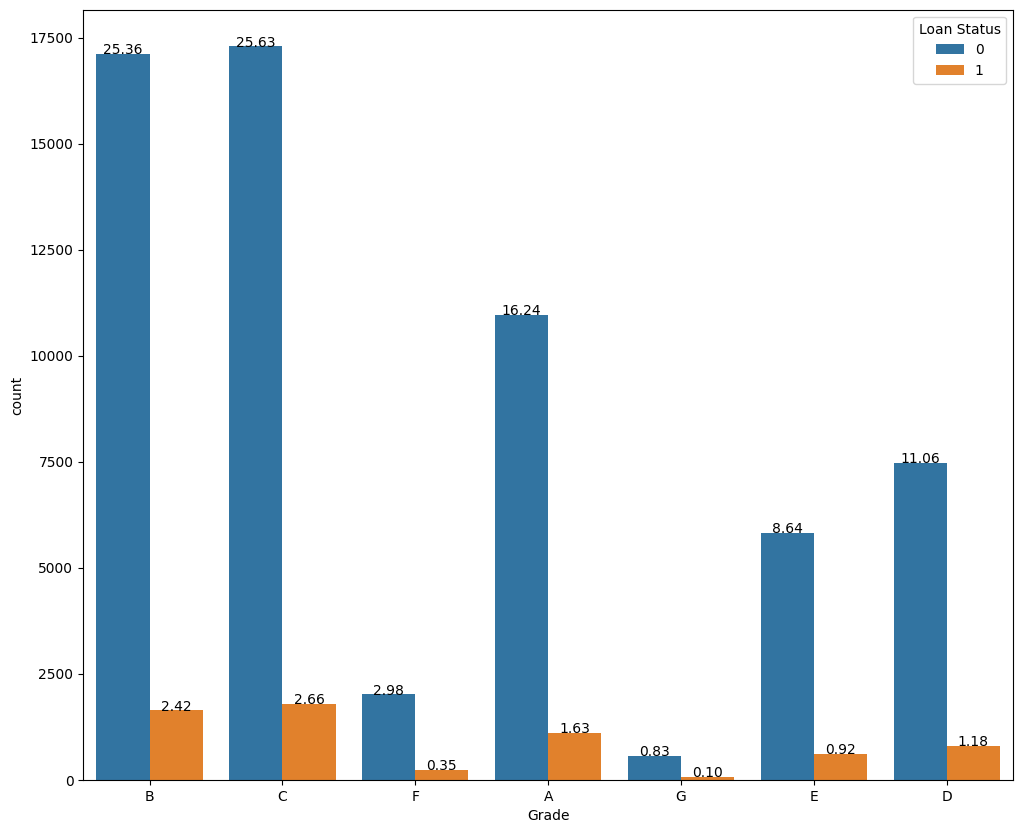

In [ ]:
# check for Loan Status with Grade in the data using countplot
plt.figure(figsize=(12,10))
total = float(len(data["Loan Status"]) )

ax = sns.countplot(x="Grade", hue="Loan Status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

From the above graph it is clear that in grade F and G number of defaulters is less.So we can consider this in analysis.

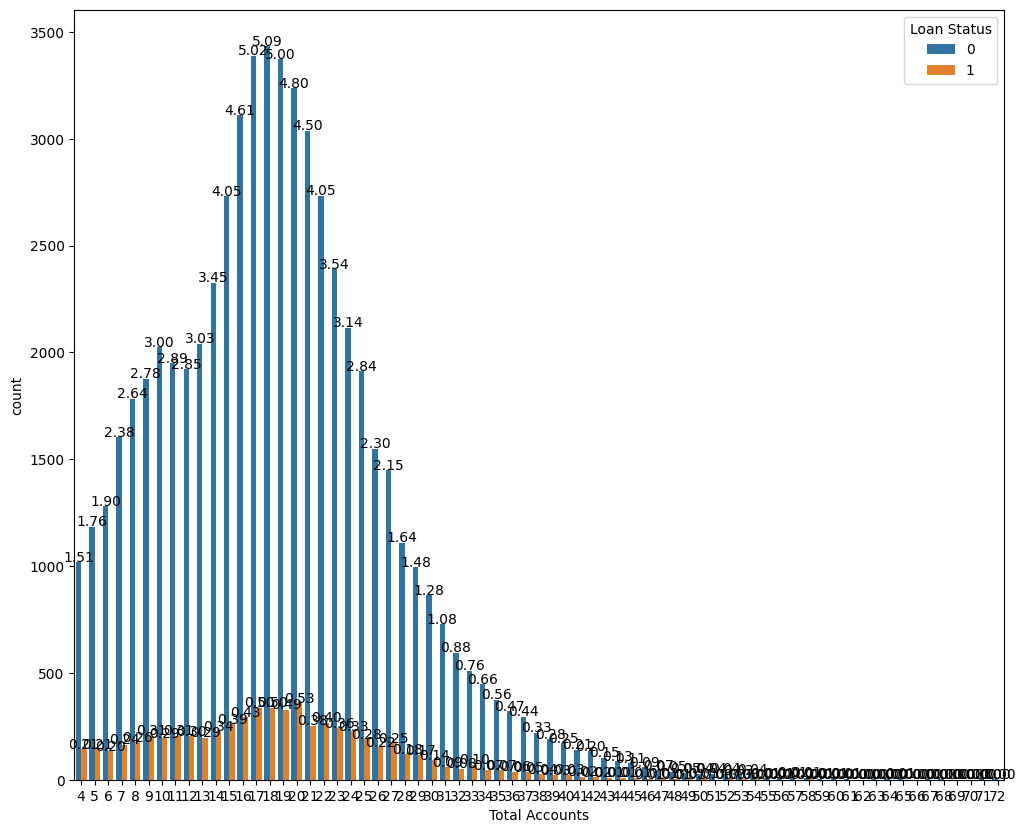

In [ ]:
# check for Loan Status with Total Account in the data using countplot
plt.figure(figsize=(12,10))
total = float(len(data["Loan Status"]) )

ax = sns.countplot(x="Total Accounts", hue="Loan Status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

From the above graph it is clear that more number of defaulters come under total accounts 12 to 15.

In [ ]:
# check for Loan Status with Last Week Pay in the data using countplot
#sns.barplot(x=data["Loan Status"],y=data["Last week Pay"])
#plt.show()

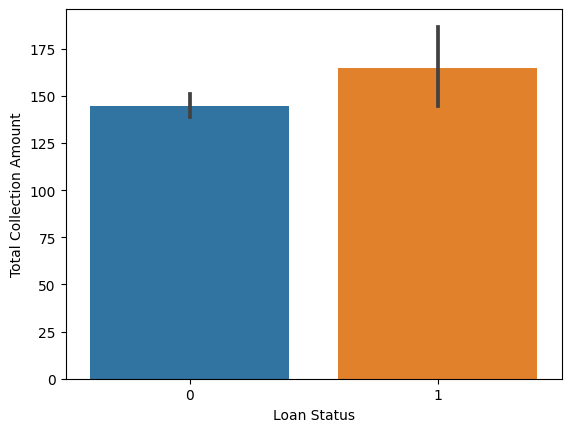

In [ ]:
# check for Loan Status with Total Collection Amount in the data using countplot
sns.barplot(x=data["Loan Status"],y=data["Total Collection Amount"])
plt.show()

Defaulters are having high collection amount so it is useful for analysis.

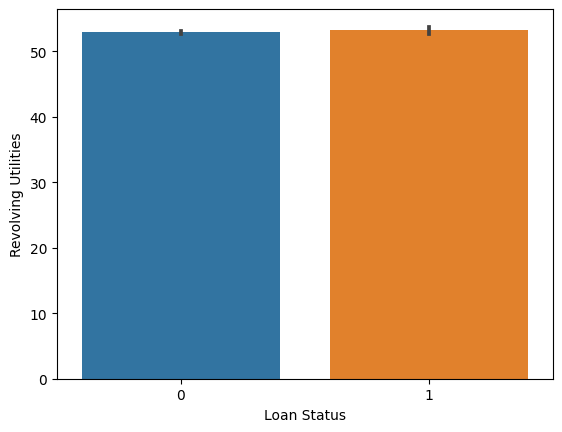

In [ ]:
# check for Loan Status with Revolving Utilities in the data using countplot
sns.barplot(x=data["Loan Status"],y=data["Revolving Utilities"])
plt.show()

From the above graph it is clear that revolving utility is not having much importance in analysis.

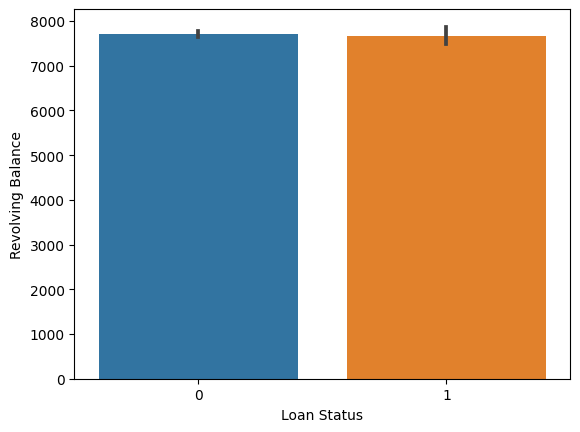

In [ ]:
# check for Loan Status with Revolving Balance in the data using countplot
sns.barplot(x=data["Loan Status"],y=data["Revolving Balance"])
plt.show()

It is clear that revolving balance of defaulters is high so we can take it in analysis.

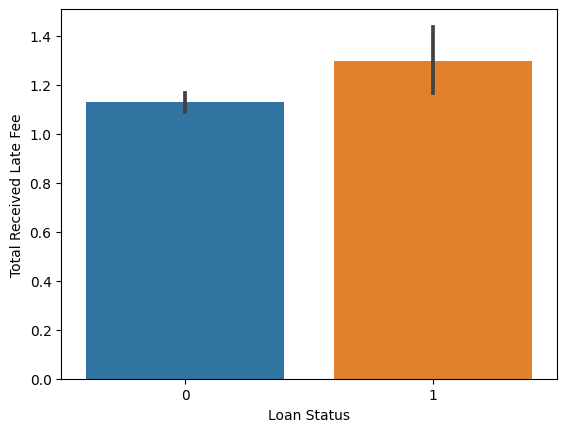

In [ ]:
# check for Loan Status with Total Received Late Fee in the data using countplot
sns.barplot(x=data["Loan Status"],y=data["Total Received Late Fee"])
plt.show()

from the above graph Total Received Late fee is from defaulters of loan so we can take this field in analysis.

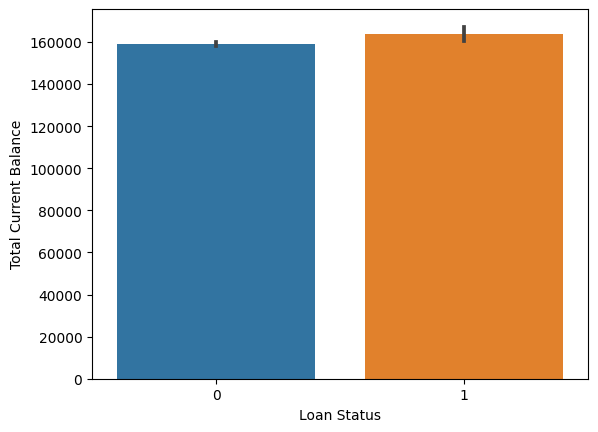

In [ ]:
# check for Loan Status with Total Current Balance in the data using countplot
sns.barplot(x=data["Loan Status"],y=data["Total Current Balance"])
plt.show()

Since total current balance is high for defaulters it is not useful


In [ ]:
data.nunique()

Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Home Ownership                      3
Duration                        67221
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection Recovery Fee         67313
Collection 1

In [ ]:
numeric=[feature for feature in data.columns if data[feature].dtypes!="o" and data[feature].nunique()>200 and feature != "ID"]
numeric

['Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Interest Rate',
 'Duration',
 'Debit to Income',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Received Interest',
 'Total Received Late Fee ',
 'Recoveries',
 'Collection Recovery Fee',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit']

In [ ]:
discrete=[feature for feature in data.columns if feature not in numeric and feature not in ["ID","Employment Duration",'Accounts Delinquent','Loan Status']]
discrete

['Term',
 'Batch Enrolled',
 'Grade',
 'Sub Grade',
 'Home Ownership',
 'Verification Status',
 'Payment Plan',
 'Loan Title',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Total Accounts',
 'Initial List Status',
 'Collection 12 months Medical',
 'Application Type',
 'Last week Pay']

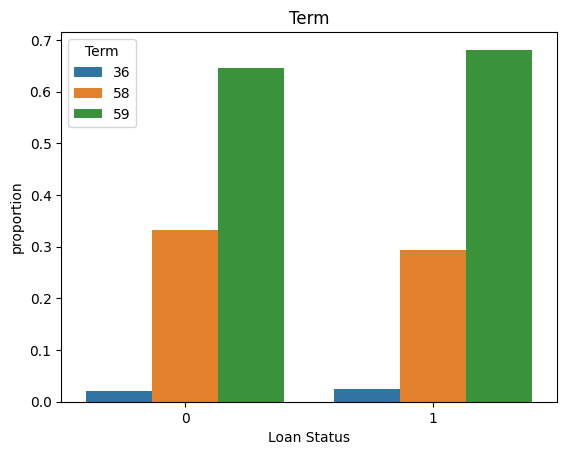

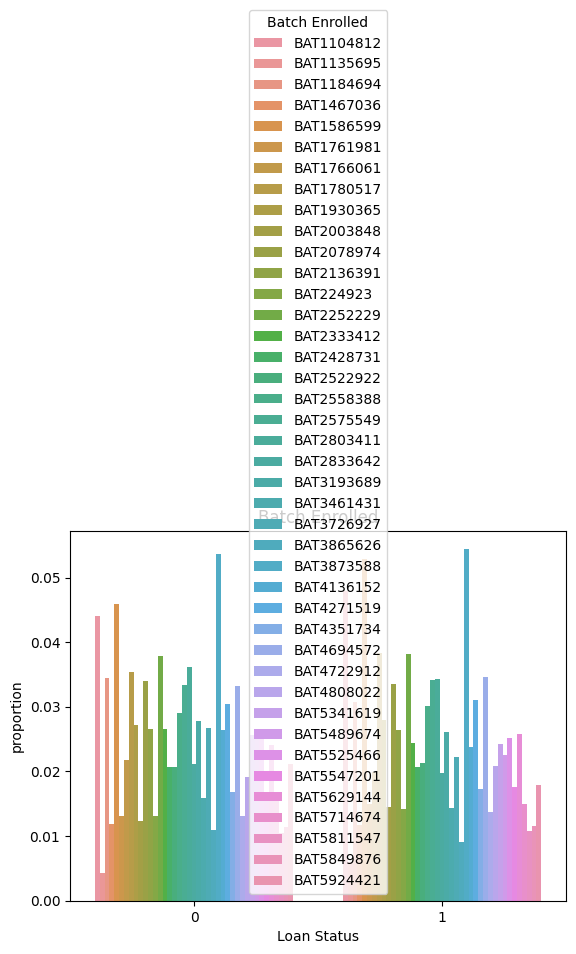

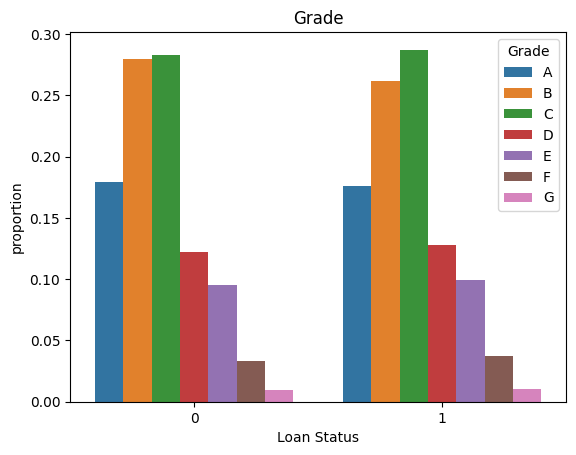

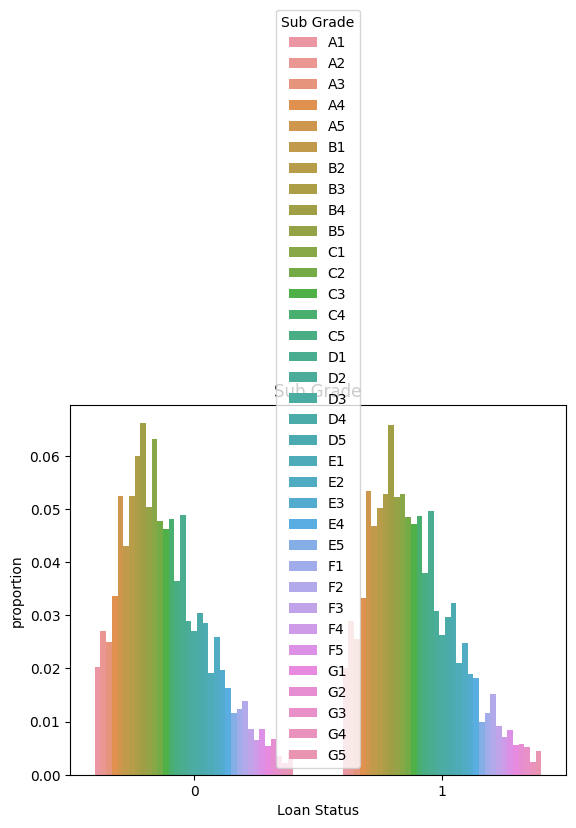

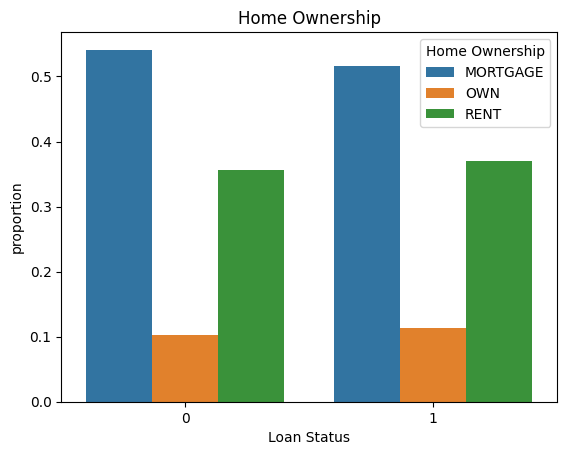

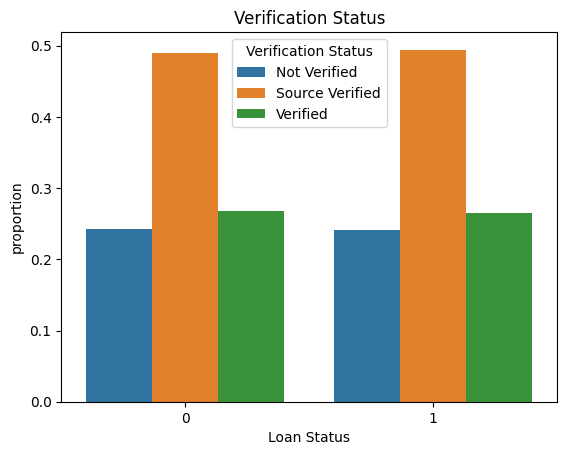

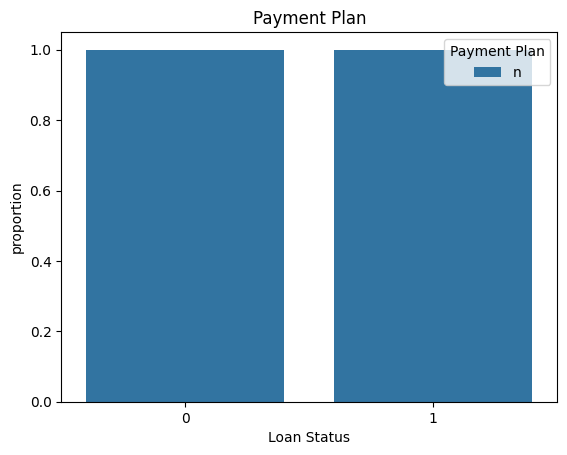

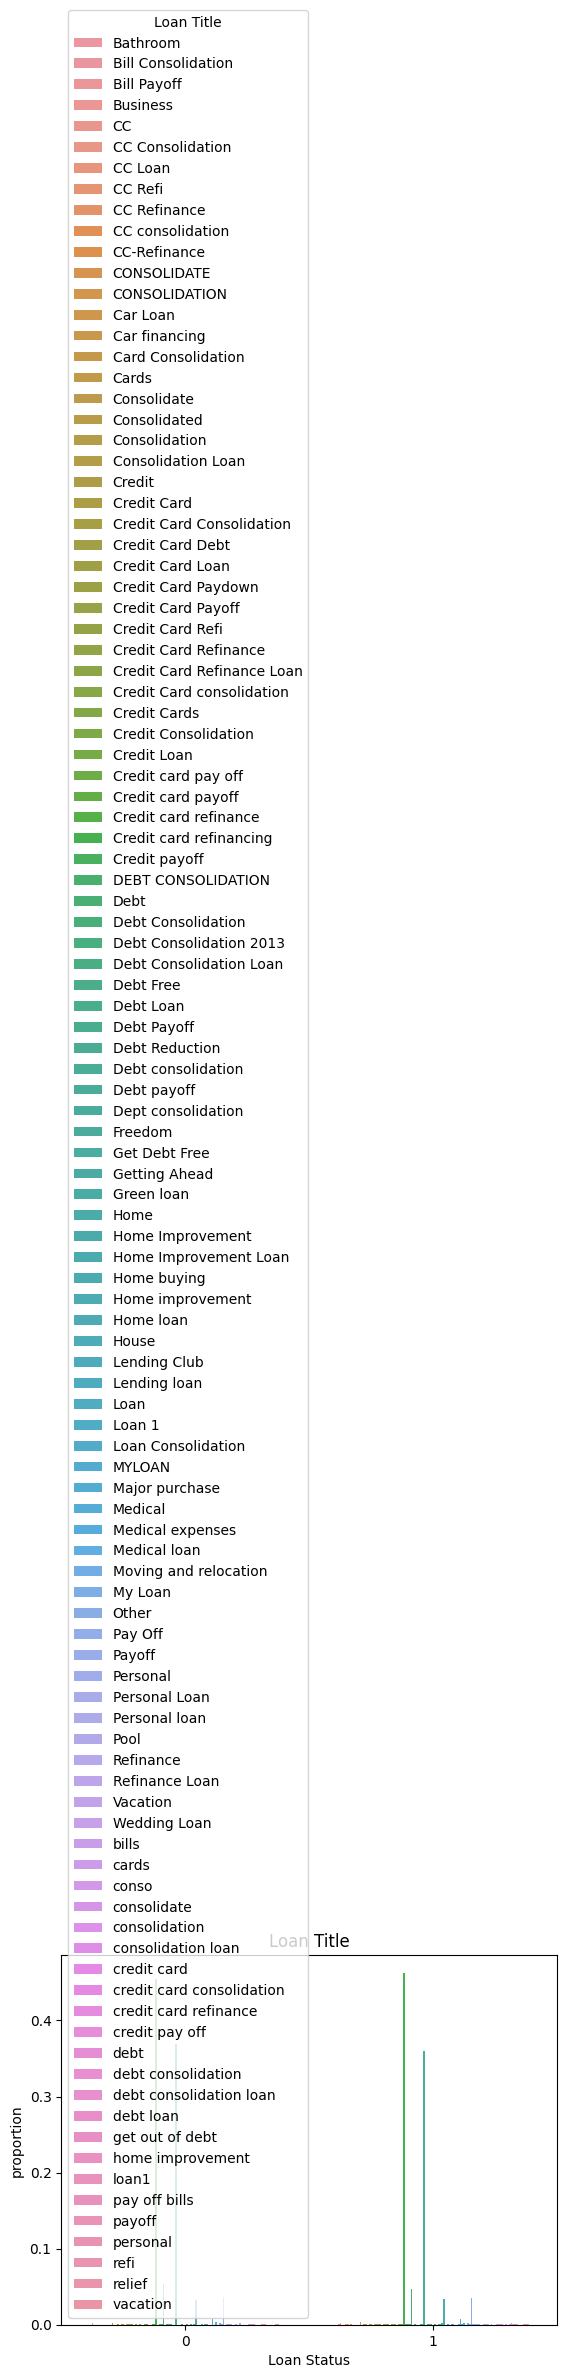

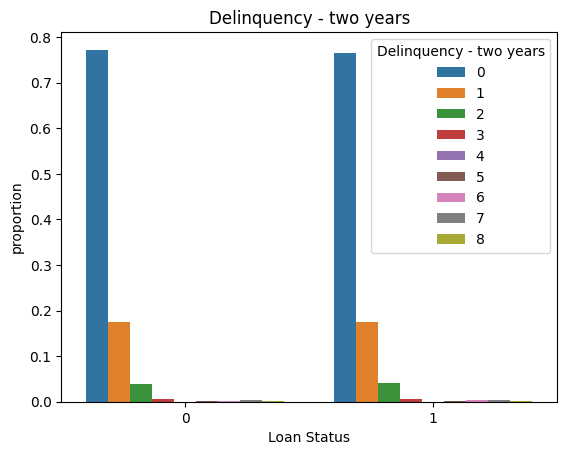

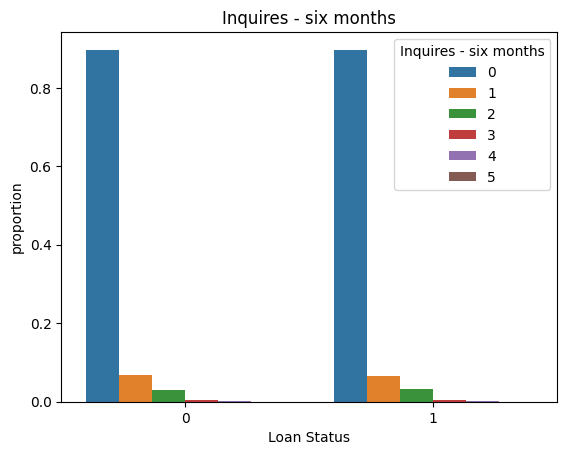

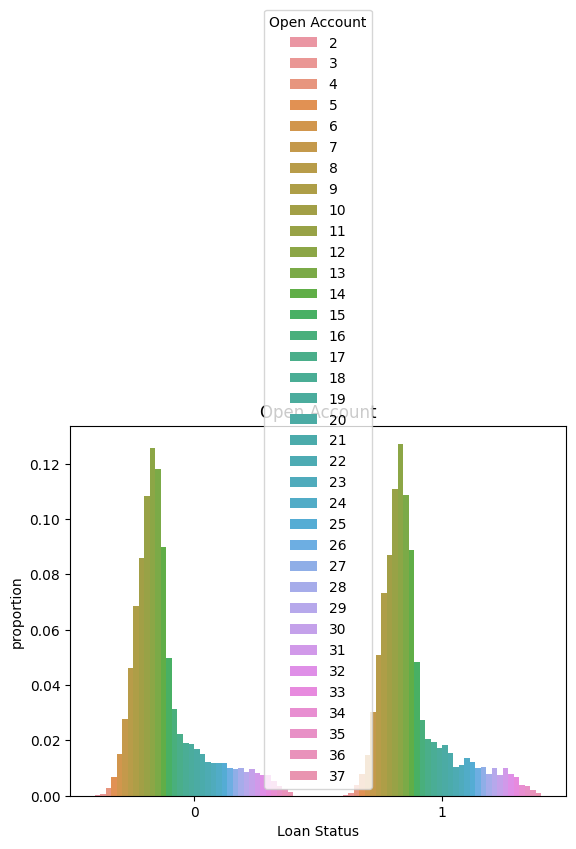

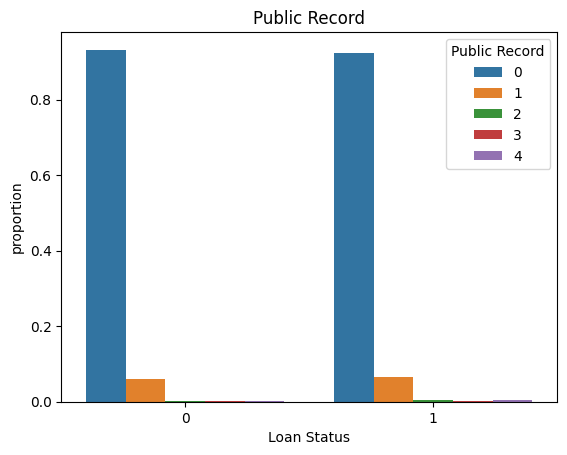

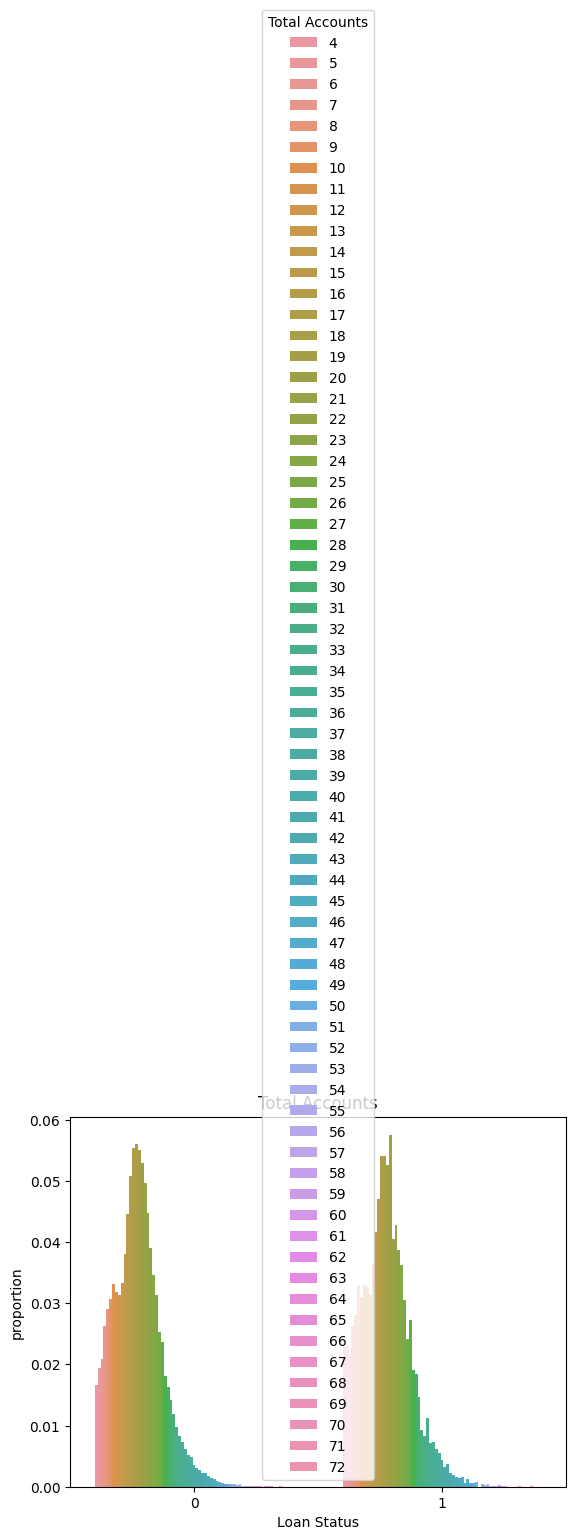

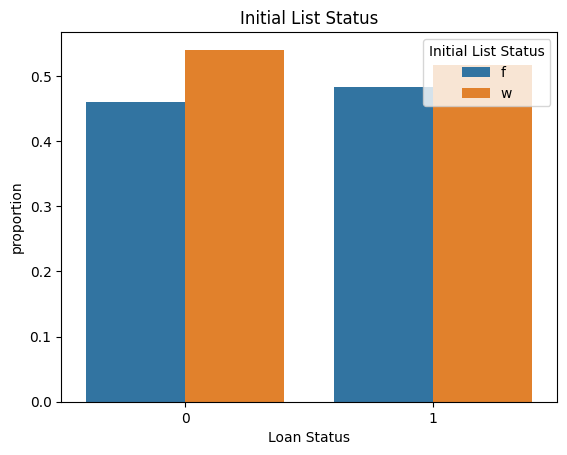

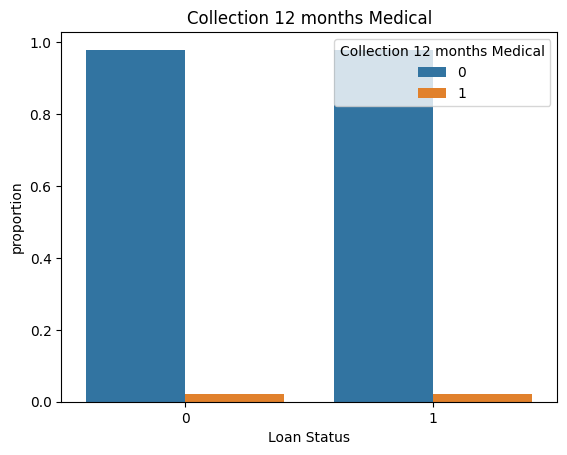

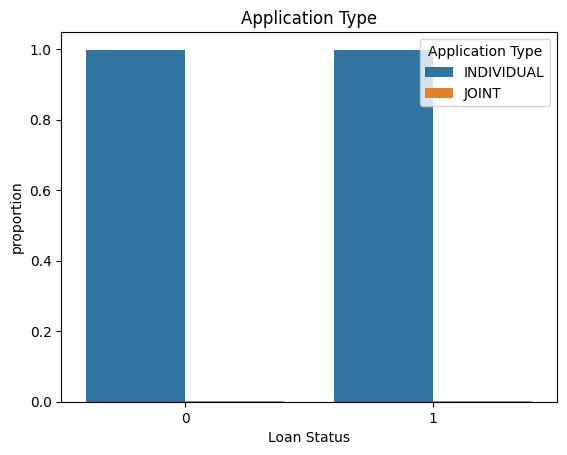

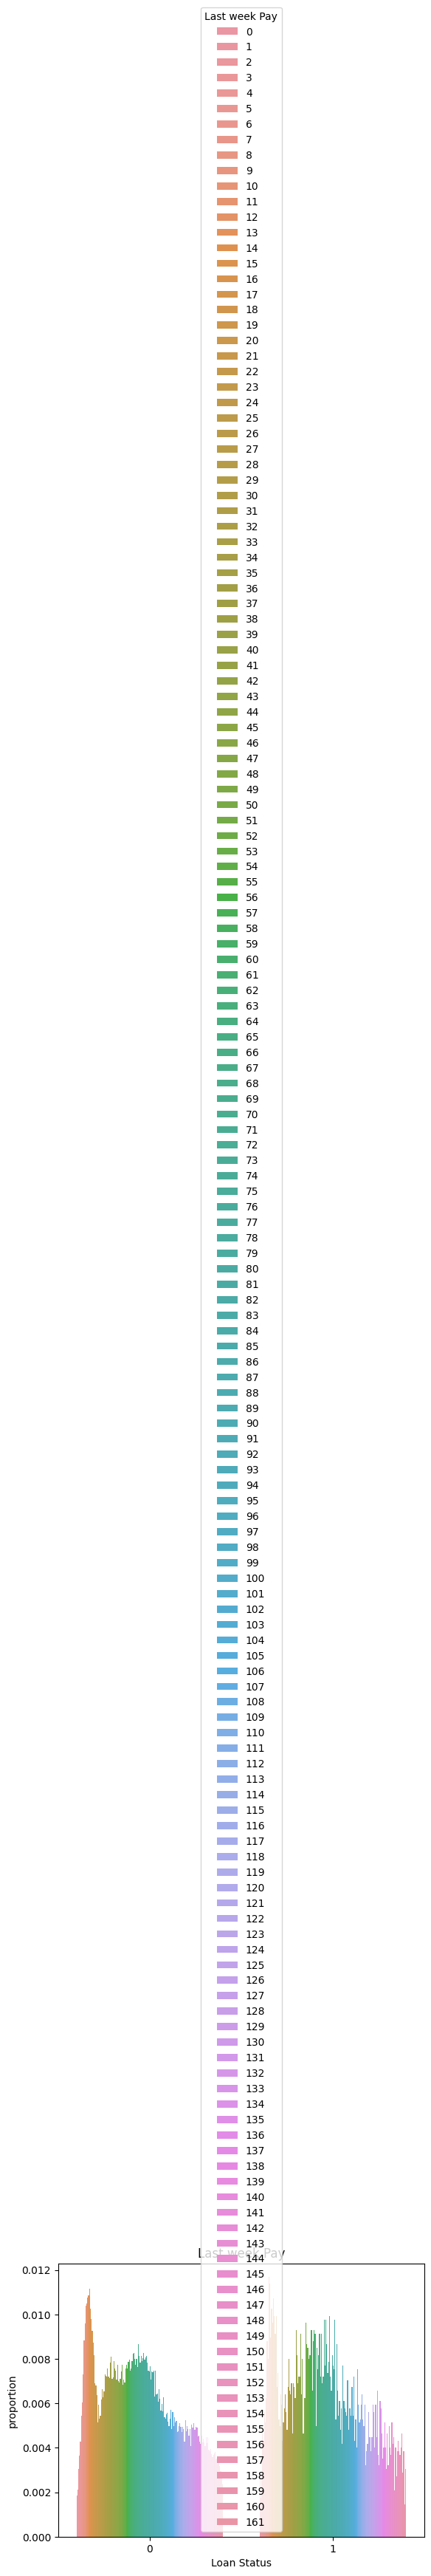

In [ ]:
for a in discrete :
    sum_data = data.groupby([a, "Loan Status"])["Loan Status"].agg(['count']).reset_index()
    sum_data["proportion"] = 0

    for i in set(sum_data[a]):
        for j in range(2):
            prop = sum_data.loc[(sum_data[a] == i) & (sum_data["Loan Status"] == j), "count"].sum() / len(data[(data["Loan Status"] == j)])
            sum_data.loc[(sum_data[a] == i) & (sum_data["Loan Status"] == j), "proportion"] = prop
            
    sns.barplot(x="Loan Status",y="proportion",hue=a,data=sum_data)
    plt.title(a)
    plt.show()

**Multivariate analysis**

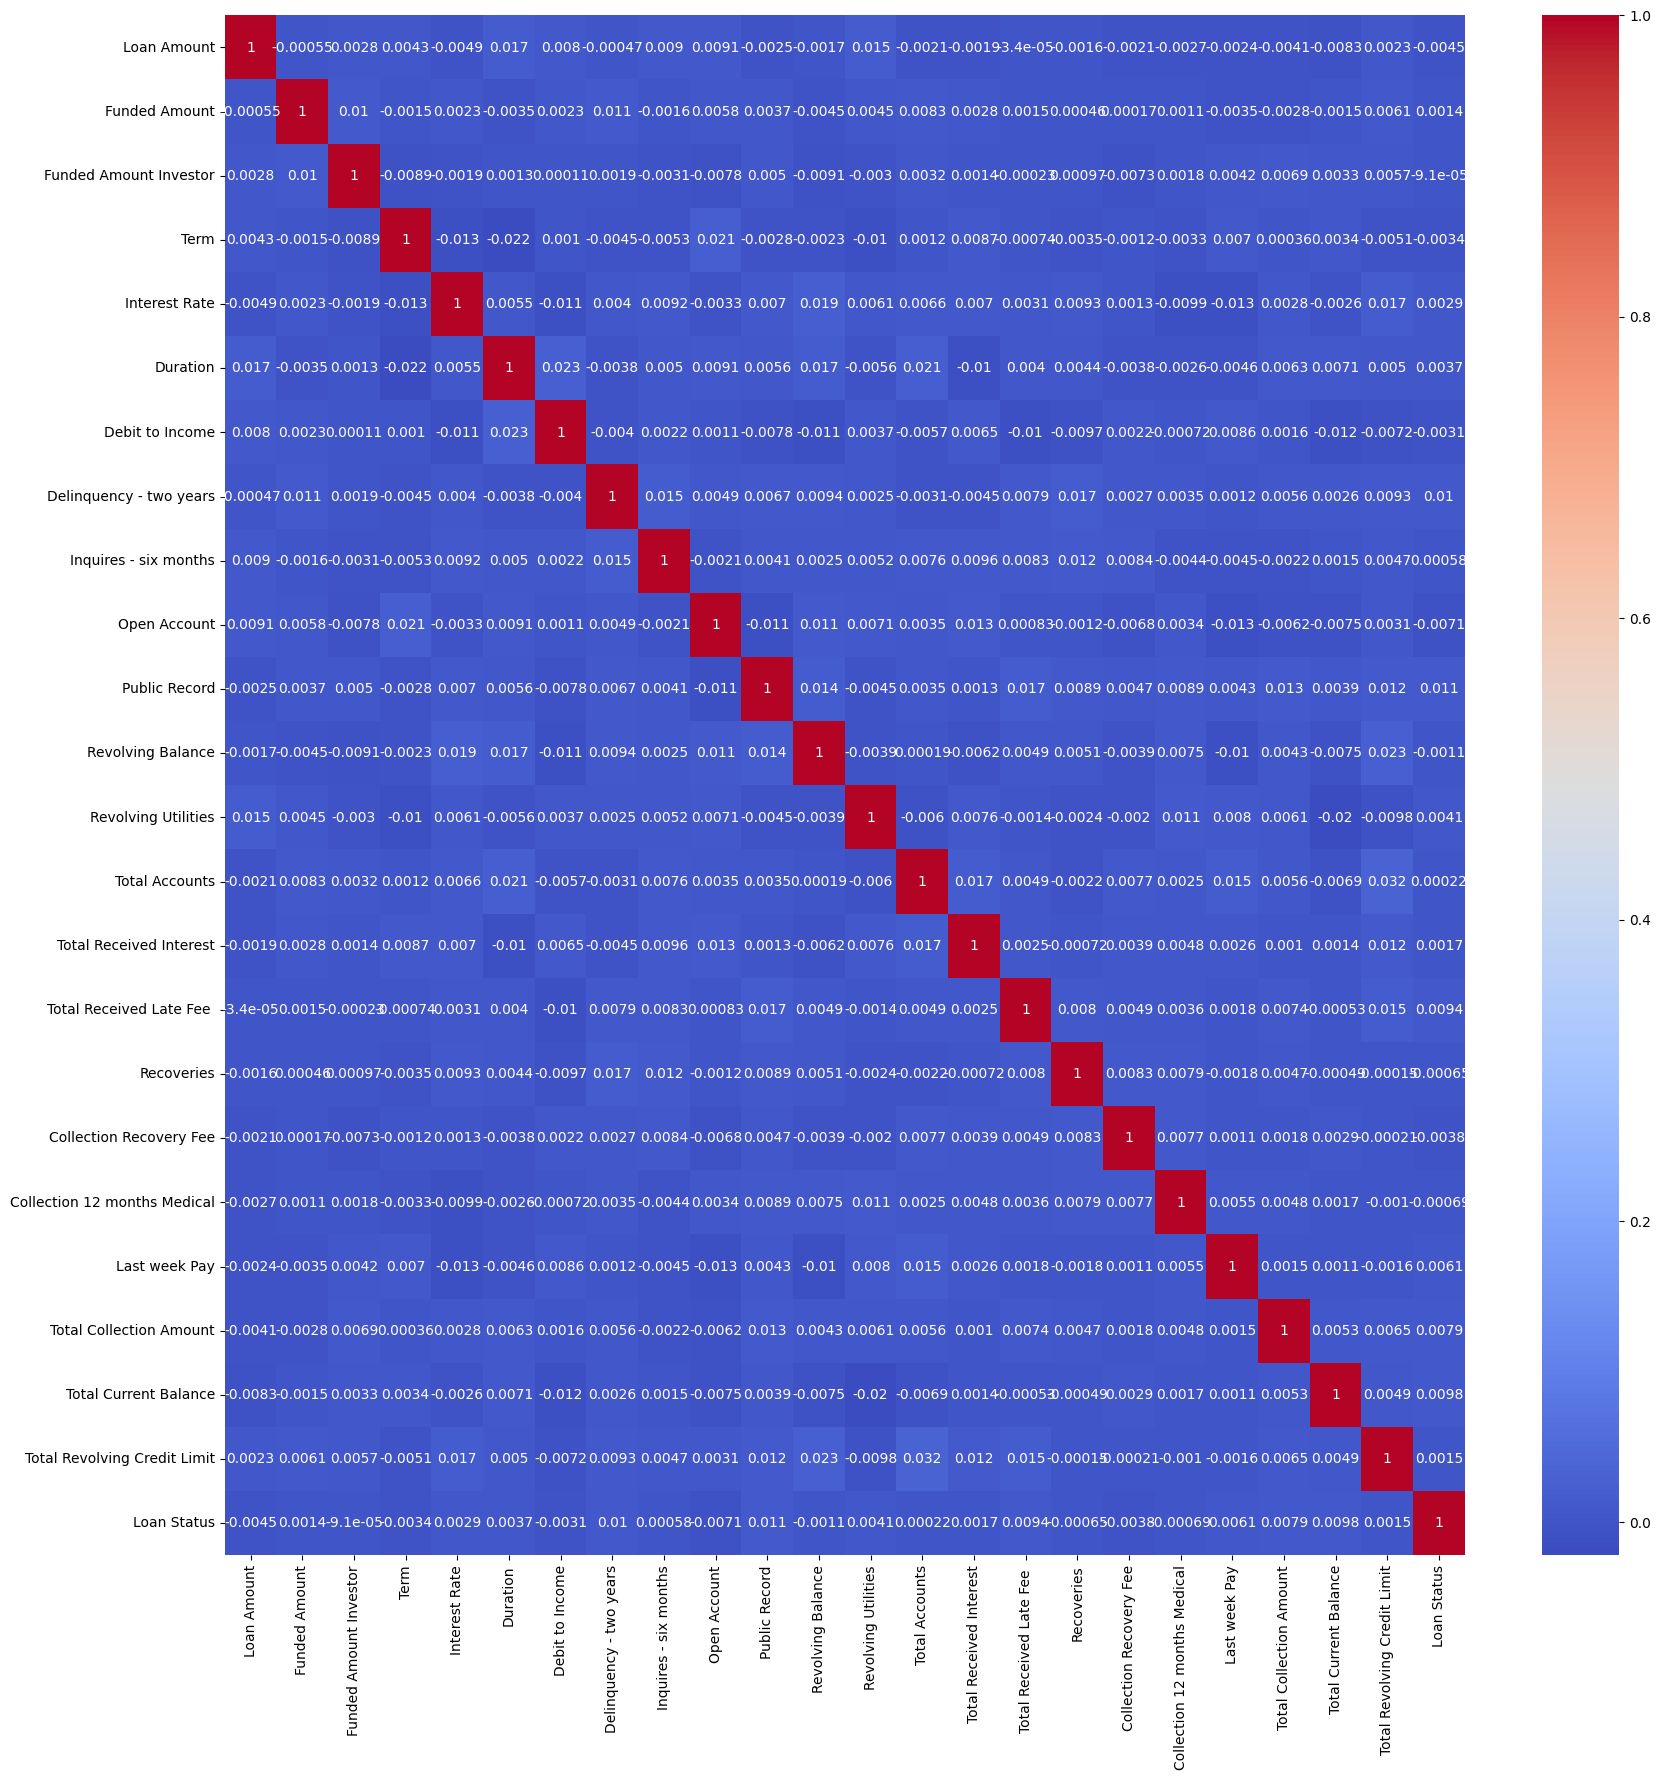

In [ ]:
data.drop('Accounts Delinquent',1,inplace=True)
correlation=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()



```
# This is formatted as code
```

Data Preprocessing

Label Encoding

In [ ]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,176346.63,16.284758,1,0,13,...,2929.646315,0.102000,2.498291,0.793724,0,49,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,39833.92,15.412409,0,0,12,...,772.769385,0.036181,2.377215,0.974821,0,109,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,91506.69,28.137619,0,0,14,...,863.324396,18.778660,4.316277,1.020075,0,66,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,108286.58,18.043730,1,0,7,...,288.173196,0.044131,0.107020,0.749971,0,39,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,44234.83,17.209886,1,3,13,...,129.239553,19.306646,1294.818751,0.368953,0,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,9.408858,83961.15,28.105127,1,0,13,...,1978.945960,0.023478,564.614852,0.865230,0,69,48,181775,34301,1
67459,8323,11046,15637.46301,59,9.972104,65491.13,17.694279,0,0,12,...,3100.803125,0.027095,2.015494,1.403368,0,14,37,22692,8714,0
67460,15897,32921,12329.45775,59,19.650943,34813.97,10.295774,0,0,7,...,2691.995532,0.028212,5.673092,1.607093,0,137,17,176857,42330,0
67461,16567,4975,21353.68465,59,13.169095,96938.84,7.614624,0,0,14,...,3659.334202,0.074508,1.157454,0.207608,0,73,61,361339,39075,0


In [ ]:
data.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Home Ownership', 'Duration', 'Verification Status', 'Payment Plan',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee ', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [ ]:
new_data=data.drop(['Term','Payment Plan','Application Type','Loan Title','Verification Status','Sub Grade','Batch Enrolled','Loan Amount', 'Funded Amount', 'Funded Amount Investor','Batch Enrolled', 'Interest Rate', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months','Public Record','Initial List Status', 'Collection 12 months Medical', 'Application Type','Total Revolving Credit Limit','Revolving Utilities','Total Current Balance','Recoveries','Collection Recovery Fee','Total Received Interest','Last week Pay'],axis=1)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Grade                     67463 non-null  object 
 1   Home Ownership            67463 non-null  object 
 2   Duration                  67463 non-null  float64
 3   Open Account              67463 non-null  int64  
 4   Revolving Balance         67463 non-null  int64  
 5   Total Accounts            67463 non-null  int64  
 6   Total Received Late Fee   67463 non-null  float64
 7   Total Collection Amount   67463 non-null  int64  
 8   Loan Status               67463 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 4.6+ MB


Term,	Grade,	Home Ownership,	Annual Income, Open Account,	Revolving Balance,	Total Accounts,	Total Received Late Fee,	Total Collection Amount,	Loan Status are important features

In [ ]:
cat_data=new_data.select_dtypes(include=['object'])
cat_data

,Grade,Home Ownership
0,B,MORTGAGE
1,C,RENT
2,F,MORTGAGE
3,C,MORTGAGE
4,C,MORTGAGE
...,...,...
67458,C,MORTGAGE
67459,C,RENT
67460,A,MORTGAGE
67461,D,OWN


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()
new_data['Grade']=le.fit_transform(new_data['Grade'])
new_data['Home Ownership']=le1.fit_transform(new_data['Home Ownership'])


In [ ]:
import pickle
#Grade
le_pkl = open('le.pkl','wb')
pickle.dump(le,le_pkl)
le_pkl.close()



In [ ]:
#Home Ownership
le1_pkl = open('le1.pkl','wb')
pickle.dump(le1,le1_pkl)
le1_pkl.close()

In [ ]:
aa= pickle.load(open('le1.pkl','rb'))
#aa.transform(['Urban'])[0]

In [ ]:
aa= pickle.load(open('le.pkl','rb'))
aa.transform(['C'])[0]

2

In [ ]:
#from sklearn.preprocessing import OneHotEncoder


#ohe = OneHotEncoder(sparse=False)

#ohe_grade = ohe.fit_transform(new_data[['Grade']])
#new_data = new_data.join(pd.DataFrame(ohe_grade, columns=['Grade_A','Grade_B','Grade_C','Grade_D','Grade_E','Grade_F','Grade_G']))

# Encode the 'Home Ownership' column using one-hot encoding and add the resulting columns to the DataFrame
#ohe_home_ownership = ohe.fit_transform(new_data[['Home Ownership']])
#new_data = new_data.join(pd.DataFrame(ohe_home_ownership,columns=['Mortgage','Own','rent']))


In [ ]:
new_data

,Grade,Home Ownership,Duration,Open Account,Revolving Balance,Total Accounts,Total Received Late Fee,Total Collection Amount,Loan Status
0,1,0,176346.63,13,24246,7,0.102000,31,0
1,2,2,39833.92,12,812,13,0.036181,53,0
2,5,0,91506.69,14,1843,20,18.778660,34,0
3,2,0,108286.58,7,13819,12,0.044131,40,0
4,2,0,44234.83,13,1544,22,19.306646,430,0
...,...,...,...,...,...,...,...,...,...
67458,2,0,83961.15,13,4112,19,0.023478,48,1
67459,2,2,65491.13,12,9737,14,0.027095,37,0
67460,0,0,34813.97,7,2195,9,0.028212,17,0
67461,3,1,96938.84,14,1172,15,0.074508,61,0


Managing Outliers

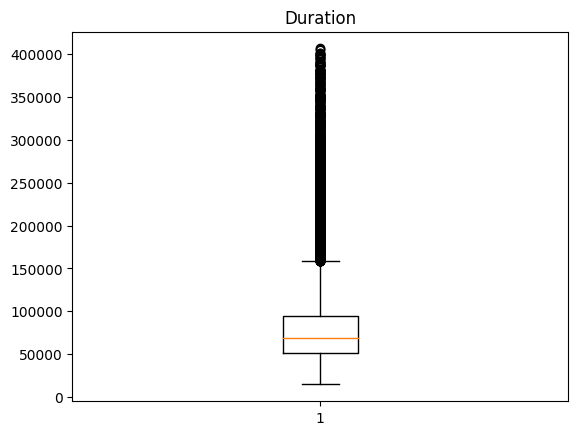

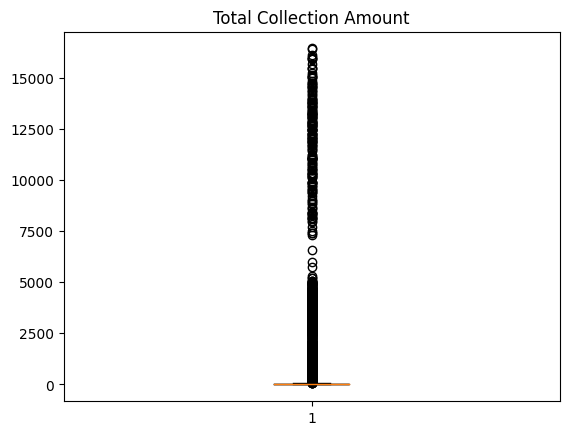

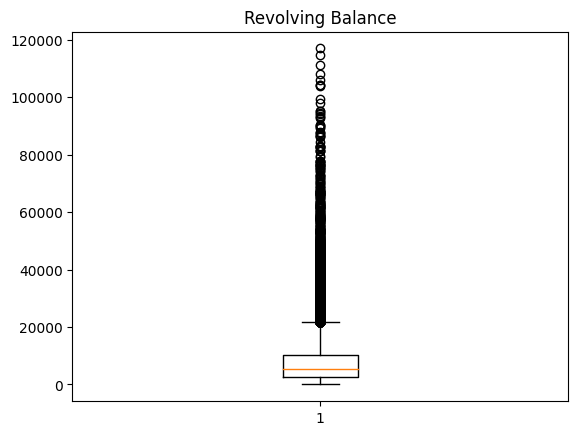

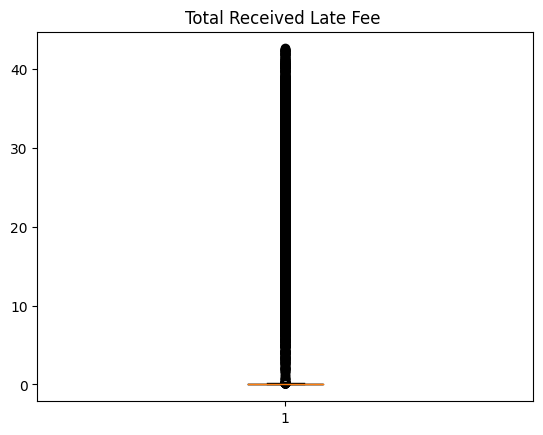

In [ ]:
for i in ['Duration','Total Collection Amount','Revolving Balance','Total Received Late Fee ']:
    plt.figure()
    plt.boxplot(new_data[i])
    plt.title(i)
    

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Grade                     67463 non-null  int64  
 1   Home Ownership            67463 non-null  int64  
 2   Duration                  67463 non-null  float64
 3   Open Account              67463 non-null  int64  
 4   Revolving Balance         67463 non-null  int64  
 5   Total Accounts            67463 non-null  int64  
 6   Total Received Late Fee   67463 non-null  float64
 7   Total Collection Amount   67463 non-null  int64  
 8   Loan Status               67463 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 4.6 MB


In [ ]:
new_data.describe()

,Grade,Home Ownership,Duration,Open Account,Revolving Balance,Total Accounts,Total Received Late Fee,Total Collection Amount,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,1.815558,0.819145,80541.502549,14.266561,7699.342425,18.627929,1.143969,146.467990,0.092510
std,1.382840,0.929574,45029.120371,6.225060,7836.148190,8.319246,5.244365,744.382233,0.289747
min,0.000000,0.000000,14573.540000,2.000000,0.000000,4.000000,0.000003,1.000000,0.000000
25%,1.000000,0.000000,51689.845000,10.000000,2557.000000,13.000000,0.021114,24.000000,0.000000
50%,2.000000,0.000000,69335.830000,13.000000,5516.000000,18.000000,0.043398,36.000000,0.000000
75%,3.000000,2.000000,94623.320000,16.000000,10184.500000,23.000000,0.071884,46.000000,0.000000
max,6.000000,2.000000,406561.540000,37.000000,116933.000000,72.000000,42.618882,16421.000000,1.000000


In [ ]:
for i in['Revolving Balance','Total Received Late Fee ','Duration']:  
#for i in['Revolving Balance']:  
    q1=np.percentile(new_data[i],25,interpolation='midpoint')
    q2=np.percentile(new_data[i],50,interpolation='midpoint')
    q3=np.percentile(new_data[i],75,interpolation='midpoint')
    iqr=q3-q1
    min_limit=q1-1.5*iqr
    max_limit=q3+1.5*iqr
    outlier=[]
    for x in new_data[i]:
        if((x>max_limit) or (x<min_limit)):
            outlier.append(x)
    print(outlier)
    new_data.loc[new_data[i]>max_limit,i]=np.median(new_data[i])
    new_data.loc[new_data[i]<min_limit,i]=np.median(new_data[i])
    print("Outliers in ",i," column is removed")

[24246, 34696, 38326, 34647, 25973, 21921, 30247, 23774, 25048, 23857, 26505, 24067, 21667, 22750, 29520, 22609, 22626, 27274, 21991, 57791, 33995, 24856, 24513, 29623, 22313, 24102, 29480, 68741, 26815, 29212, 31781, 35759, 28702, 23040, 24490, 30433, 23261, 23098, 23470, 24307, 33901, 24239, 26336, 27839, 57195, 46281, 26740, 38783, 30986, 73941, 87923, 24872, 41729, 38610, 29518, 24223, 25561, 29351, 23243, 27188, 27805, 22414, 22029, 36600, 29996, 27784, 22344, 37555, 21654, 29679, 24342, 28848, 94110, 32251, 23044, 25855, 33389, 24532, 35171, 23482, 21676, 24118, 23943, 21933, 39345, 30850, 23883, 26691, 24704, 26073, 21863, 22130, 26588, 25357, 24716, 22339, 24346, 22883, 21641, 93219, 27692, 30475, 22290, 28732, 30026, 29671, 31709, 86154, 24054, 26981, 32004, 25887, 27869, 26992, 27114, 45644, 24582, 32310, 22795, 38468, 35879, 27978, 104159, 21639, 24426, 32231, 24664, 29017, 22898, 24673, 25094, 22770, 37851, 23480, 42583, 23821, 23130, 22769, 25310, 29369, 57471, 36944, 2349

In [ ]:
new_data.describe()

,Grade,Home Ownership,Duration,Open Account,Revolving Balance,Total Accounts,Total Received Late Fee,Total Collection Amount,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,1.815558,0.819145,72086.707400,14.266561,5894.935416,18.627929,0.045562,146.467990,0.092510
std,1.382840,0.929574,28701.499177,6.225060,4225.506615,8.319246,0.030336,744.382233,0.289747
min,0.000000,0.000000,14573.540000,2.000000,0.000000,4.000000,0.000003,1.000000,0.000000
25%,1.000000,0.000000,51689.845000,10.000000,2557.000000,13.000000,0.021114,24.000000,0.000000
50%,2.000000,0.000000,69335.830000,13.000000,5516.000000,18.000000,0.043398,36.000000,0.000000
75%,3.000000,2.000000,85911.010000,16.000000,8254.500000,23.000000,0.065127,46.000000,0.000000
max,6.000000,2.000000,159010.440000,37.000000,18274.000000,72.000000,0.147732,16421.000000,1.000000


Scaling

In [ ]:
from  sklearn.preprocessing import MinMaxScaler
import pickle


In [ ]:
scale=MinMaxScaler ()

new_data['Total Received Late Fee ']=scale.fit_transform(new_data[['Total Received Late Fee ']])
L_Fee_pkl = open('L_Fee.pkl','wb')
pickle.dump(scale,L_Fee_pkl)
L_Fee_pkl.close()

new_data['Total Collection Amount']=scale.fit_transform(new_data[['Total Collection Amount']])
Coll_pkl = open('Coll.pkl','wb')
pickle.dump(scale,Coll_pkl)
Coll_pkl.close()

new_data['Revolving Balance']=scale.fit_transform(new_data[['Revolving Balance']])
RBal_pkl = open('RBal.pkl','wb')
pickle.dump(scale,RBal_pkl)
RBal_pkl.close()

new_data['Duration']=scale.fit_transform(new_data[['Duration']])
Dur_pkl = open('Dur.pkl','wb')
pickle.dump(scale,Dur_pkl)
Dur_pkl.close()

new_data

,Grade,Home Ownership,Duration,Open Account,Revolving Balance,Total Accounts,Total Received Late Fee,Total Collection Amount,Loan Status
0,1,0,0.379143,13,0.255099,7,0.690433,0.001827,0
1,2,2,0.174889,12,0.037553,13,0.244895,0.003167,0
2,5,0,0.532642,14,0.085233,20,0.293744,0.002010,0
3,2,0,0.648816,7,0.639088,12,0.298711,0.002375,0
4,2,0,0.205358,13,0.071405,22,0.293744,0.026127,0
...,...,...,...,...,...,...,...,...,...
67458,2,0,0.480401,13,0.190168,19,0.158904,0.002862,1
67459,2,2,0.352525,12,0.450308,14,0.183388,0.002192,0
67460,0,0,0.140133,7,0.101512,9,0.190947,0.000974,0
67461,3,1,0.570251,14,0.054202,15,0.504337,0.003654,0


In [ ]:
aa= pickle.load(open('Dur.pkl','rb'))
aa.transform([[68062]])[0,0]

0.370324065387723

In [ ]:
new_data.describe()

,Grade,Home Ownership,Duration,Open Account,Revolving Balance,Total Accounts,Total Received Late Fee,Total Collection Amount,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,1.815558,0.819145,0.398189,14.266561,0.322586,18.627929,0.308396,0.008859,0.092510
std,1.382840,0.929574,0.198713,6.225060,0.231231,8.319246,0.205348,0.045334,0.289747
min,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.256972,10.000000,0.139926,13.000000,0.142902,0.001401,0.000000
50%,2.000000,0.000000,0.379143,13.000000,0.301850,18.000000,0.293744,0.002132,0.000000
75%,3.000000,2.000000,0.493901,16.000000,0.451707,23.000000,0.440834,0.002741,0.000000
max,6.000000,2.000000,1.000000,37.000000,1.000000,72.000000,1.000000,1.000000,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X=new_data.drop(['Loan Status'],axis=1)
calc_vif(X)
#print(vif)

,variables,VIF
0,Grade,2.508447
1,Home Ownership,1.725538
2,Duration,4.137855
3,Open Account,4.736447
4,Revolving Balance,2.525575
5,Total Accounts,4.647932
6,Total Received Late Fee,2.880568
7,Total Collection Amount,1.036371


Model Building

In [ ]:
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
#from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  AdaBoostClassifier



from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split 

from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [ ]:
X = new_data.drop('Loan Status',axis=1)
Y = new_data['Loan Status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
models={
    "KNeighbours classifier": KNeighborsClassifier(30),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "AdaBoost Classifier":AdaBoostClassifier(),
    "XGB Classifier":XGBClassifier(),
    'GaussianNB':GaussianNB(),
    
    
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)

Over Sampling of Dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X,Y)

balanced_data = X_resampled.copy()
balanced_data["Loan Status"] = y_resampled.copy()

In [ ]:
balanced_data["Loan Status"].value_counts()

0    61222
1    61222
Name: Loan Status, dtype: int64

In [ ]:
balanced_data

,Grade,Home Ownership,Duration,Open Account,Revolving Balance,Total Accounts,Total Received Late Fee,Total Collection Amount,Loan Status
0,1,0,0.379143,13,0.301850,7,0.690433,0.001827,0
1,2,2,0.174889,12,0.044435,13,0.244895,0.003167,0
2,5,0,0.532642,14,0.100854,20,0.293744,0.002010,0
3,2,0,0.648816,7,0.756211,12,0.298711,0.002375,0
4,2,0,0.205358,13,0.084492,22,0.293744,0.026127,0
...,...,...,...,...,...,...,...,...,...
122439,2,2,0.469609,8,0.099759,22,0.055677,0.002497,1
122440,2,0,0.145411,22,0.119022,14,0.406934,0.021985,1
122441,4,0,0.980859,11,0.125150,11,0.541260,0.003837,1
122442,3,0,0.493380,22,0.887326,21,0.724260,0.001583,1


In [ ]:
A=balanced_data.drop(["Loan Status"],axis=1)
B=balanced_data["Loan Status"]
x_train, x_test, y_train, y_test = train_test_split(A,B,random_state=42,test_size=0.2)

In [ ]:

rf_model=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)
rf_predict=rf_model.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,rf_predict))
print("Precision Score = ",precision_score(y_test,rf_predict))
print("Recall Score = ",recall_score(y_test,rf_predict))
print("F1 Score = ",f1_score(y_test,rf_predict))
print("Confusion Matrix",confusion_matrix(y_test,rf_predict))
cv_val=cross_val_score(rf_model,X,Y,cv=skf)
print("Cross Validation",np.mean(cv_val))
# ******************************************************************


Accuracy Score =  0.9957123606517212
Precision Score =  0.9918525224261378
Recall Score =  0.9995024050422956
F1 Score =  0.9956627700441985
Confusion Matrix [[12332    99]
 [    6 12052]]
Cross Validation 0.9069267622803094


In [ ]:
results = [] 
names = []
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name +" trained")
    cv_val=cross_val_score(model,X,Y,cv=skf)
    print(np.mean(cv_val))

KNeighbours classifier trained
0.9074900326839821
Decision Tree Classifier trained
0.8172184398279416
Random Forest Classifier trained
0.9074900348810472
AdaBoost Classifier trained
0.9074307382873025
XGB Classifier trained
0.9071787436926103
GaussianNB trained
0.9012940340758668


In [ ]:
#Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_Loan=RandomForestClassifier()
RF_Loan=RF_Loan.fit(x_train,y_train)

In [ ]:
RF_LoanPredict=RF_Loan.predict(x_test)
print("Confusion Matrix",confusion_matrix(y_test,RF_LoanPredict))

Confusion Matrix [[12426     5]
 [    0 12058]]


In [ ]:
accuracy_score(y_test,RF_LoanPredict)

0.9997958266977011

**TESTING**

In [ ]:
LoanRF_pkl = open('LoanRF.pkl','wb')
pickle.dump(RF_Loan,LoanRF_pkl)
LoanRF_pkl.close()

In [ ]:
# aa.transform([[68062]])[0,0]
mod=pickle.load(open('LoanRF.pkl','rb'))
legrade=pickle.load(open('le.pkl','rb'))
leownership=pickle.load(open('le1.pkl','rb'))
scl_col=pickle.load(open('Coll.pkl','rb'))
scl_dur=pickle.load(open('Dur.pkl','rb'))
scl_late=pickle.load(open('L_Fee.pkl','rb'))
scl_rbal=pickle.load(open('RBal.pkl','rb'))

In [ ]:
mod.predict(np.array([legrade.transform(['A'])[0],leownership.transform(['MORTGAGE'])[0],scl_dur.transform([[71528]])[0,0],10,scl_rbal.transform([[1553]])[0,0],14,
             scl_late.transform([[0]])[0,0],scl_col.transform([[430]])[0,0]]).reshape(1,-1))[0]

0

In [ ]:
x_test

,Grade,Home Ownership,Duration,Open Account,Revolving Balance,Total Accounts,Total Received Late Fee,Total Collection Amount
25709,2,0,0.358332,12,0.221079,45,0.286430,0.001462
18734,0,2,0.328850,16,0.602933,51,0.264275,0.001827
1749,2,0,0.438442,11,0.172431,34,0.204336,0.003350
92138,1,0,0.685377,14,0.068622,25,0.046620,0.003167
73566,4,0,0.790382,13,0.363905,16,0.243712,0.002923
...,...,...,...,...,...,...,...,...
7332,1,2,0.347392,24,0.112345,24,0.293744,0.001279
36290,1,2,0.359370,25,0.903141,20,0.246153,0.003106
43273,3,2,0.368837,12,0.523640,18,0.078329,0.000609
99068,2,0,0.156219,12,0.552588,34,0.061399,0.000853


In [ ]:
# RF_Loan.predict(x_test).reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
mod.predict(np.array([0,2,0.69,11,0.14,18,0.158,0.002]).reshape(1,-1))

array([1])

#Hyperparameter Tuning for Random

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators =[100,150,250]
max_features = ['auto', 'sqrt','log2']
#max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]


random_grid = {
               'n_estimators':n_estimators,
               #'n_estimators':10,
               'max_features': max_features,
               #'max_depth': max_depth,
               #'max_depth': None,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

In [ ]:
rf= RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=3,verbose=2,random_state=100,n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_randomcv.best_params_
#y_pred = best_random_grid.predict(X_test)
#accuracy_score(Y_test,Y_pred)

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'criterion': 'gini'}

In [ ]:
ypred4=rf_randomcv.predict(X_test)
ypred4
accuracy_score(Y_test,ypred4)


0.9058460808727617

In [ ]:
Y_test.value_counts()

0    15278
1     1588
Name: Loan Status, dtype: int64

In [ ]:
#confusion_matrix(Y_test,ypred3)
ypred3.sum()

0

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':[rf_randomcv.best_params_['criterion']],
    #'max_depth':[rf_randomcv.best_params_['max_depth']],
    'max_features':[rf_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf'],rf_randomcv.best_params_['min_samples_leaf']+1,
                        rf_randomcv.best_params_['min_samples_leaf']+2,rf_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomcv.best_params_['min_samples_split'],rf_randomcv.best_params_['min_samples_split']+1,
                         rf_randomcv.best_params_['min_samples_split']+2],
    'n_estimators':[rf_randomcv.best_params_['n_estimators']-100,rf_randomcv.best_params_['n_estimators'],
                  rf_randomcv.best_params_['n_estimators']+100,rf_randomcv.best_params_['n_estimators']+200]
}

In [ ]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_features': ['auto'],
                         'min_samples_leaf': [8, 9, 10, 12],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [0, 100, 200, 300]},
             verbose=2)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(max_features='auto', min_samples_leaf=8,
                       min_samples_split=10)

In [ ]:
ypred3=best_grid.predict(X_test)
ypred3
accuracy_score(Y_test,ypred3)

0.9058460808727617

In [ ]:
from sklearn.metrics import classification_report

cr2 = classification_report(ypred3, Y_test)
print(cr2)



              precision    recall  f1-score   support

           0       1.00      0.91      0.95     16866
           1       0.00      0.00      0.00         0

    accuracy                           0.91     16866
   macro avg       0.50      0.45      0.48     16866
weighted avg       1.00      0.91      0.95     16866



In [ ]:
confusion_matrix(Y_test,ypred3)

array([[15278,     0],
       [ 1588,     0]])

**Pickling the Model**

In [ ]:
import pickle

**Hyperparameter Tuning for SVM**


In [ ]:
sv = SVC()

clf = RandomizedSearchCV(estimator=sv,
                   cv = 3, 
                   param_distributions=params,
                   scoring='accuracy', 
                   n_jobs = -1,
                   verbose=1)

In [ ]:
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("better accuracy: ", (clf.best_score_)**(1/2.0))

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)